Concepts and data from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " available at [www.StatLearning.com](http://www.StatLearning.com).

For Tables reference see [http://data8.org/datascience/tables.html](http://data8.org/datascience/tables.html)

http://jeffskinnerbox.me/notebooks/matplotlib-2d-and-3d-plotting-in-ipython.html


In [1]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
from sklearn import linear_model
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=2, color='r')
from ipywidgets import interact
# datascience version number of last run of this notebook
version.__version__


'0.5.19'

In [2]:
import sys
sys.path.append("..")
from ml_table import ML_Table

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

'en_US.UTF-8'

In [3]:
def simdata(n, f, eps, low, high):
    x_tbl = ML_Table().sequence('x', n, low, high)
    s_tbl = ML_Table().with_column('i', range(n))
    s_tbl['x'] = x_tbl.sample()['x']+ (np.random.rand(n)-0.5)/(2*n)                
    s_tbl['f'] = s_tbl.apply(f, 'x')
    s_tbl['Y'] = s_tbl['f'] + eps*(np.random.rand(n)-0.5)
    return s_tbl   

In [4]:
def polyf(x):
    return 2 + (x-0.5)**2 - 0.1*x**3
def linf(x):
    return 3*x

In [5]:
d = simdata(20, linf, 4, 0, 8)

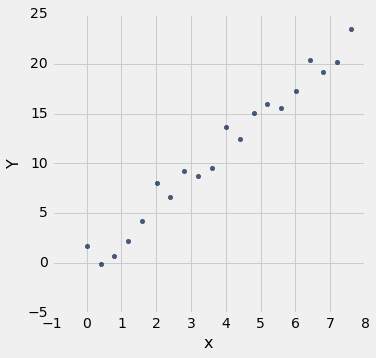

In [6]:
d.scatter('x', 'Y')

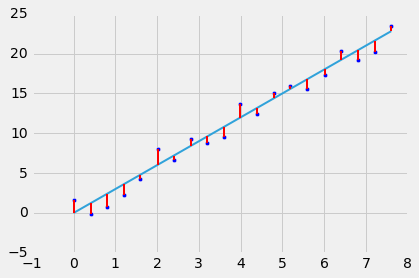

In [7]:
d.plot_fit_1d('x', 'Y', linf)

In [8]:
dmodel = d.select(['x', 'Y']).regression('Y')

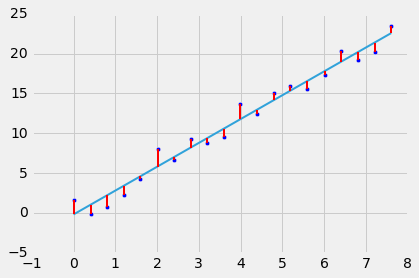

In [9]:
d.plot_fit_1d('x', 'Y', dmodel)

In [10]:
def simdata2D(n, f, eps, low, high):
    x_tbl = ML_Table().sequence('x', n, low, high)
    s_tbl = ML_Table().with_column('i', range(n))
    s_tbl['x'] = x_tbl.sample()['x']+ (np.random.rand(n)-0.5)/(2*n) 
    s_tbl['y'] = x_tbl.sample()['x']+ (np.random.rand(n)-0.5)/(2*n)    
    s_tbl['f'] = s_tbl.apply(f, ['x', 'y'])
    s_tbl['Z'] = s_tbl['f'] + eps*(np.random.rand(n)-0.5)
    return s_tbl   

In [11]:
def f2d(x,y):
    return 3*x+2*y+1.5

In [12]:
d2d = simdata2D(30, f2d, 10, 1, 8)

In [13]:
d2model = d2d.select(['x', 'y', 'Z']).regression('Z')

In [15]:
d2d.apply(d2model, ['x', 'y'])

array([ 34.05833435,  29.6599973 ,  15.8238603 ,  33.29745467,
        35.13447411,  17.06305438,  22.63430831,  30.30258179,
        27.23495559,  24.64815785,  14.25648069,  29.5020685 ,
        20.91349228,  18.50402024,  19.08316882,  15.40943242,
        22.69363388,  17.33866883,  35.21945467,  12.10099904,
        26.42526077,  18.20566794,  20.06840014,  22.19989122,
        20.99880162,  23.69096505,  25.53021855,  24.96942399,
        27.59716861,  22.34553776])

TypeError: f2d() takes 2 positional arguments but 4 were given

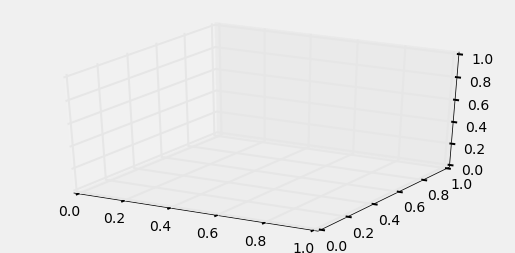

In [16]:
d2d.plot_fit_2d('x', 'y', 'Z', f2d, figsize=(8,4))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

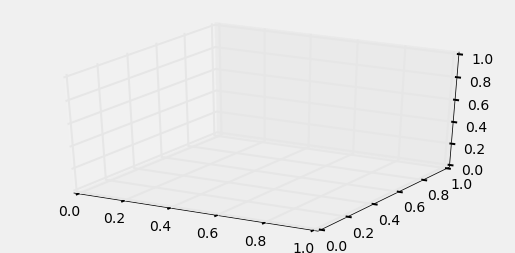

In [18]:
d2d.select(['x', 'y', 'Z']).plot_fit_2d('x', 'y', 'Z', d2model, figsize=(8,4))

In [ ]:
d2d = simdata2D(20, f2d, 2, 1, 8)
ax = d2d.plot_fit_2d('x', 'y', 'Z', f2d, figsize=(8,4))

In [ ]:

reg = linear_model.LinearRegression()
reg.fit(np.transpose([d2d['x'], d2d['y']]), d2d['Z'])

In [ ]:
V = reg.coef_

In [ ]:
c = reg.intercept_

In [ ]:
def rgr(*args):
    print(np.array(args))
    return sum(np.array(args) + V)+c

In [ ]:
rgr(1,1)

In [ ]:
(lambda *args: sum(np.array(args) + V)+c)

In [ ]:
reg.residues_

In [ ]:
def g(x):
    return 2 + (x-0.5) + 0.1*x*x

In [ ]:
dg = ML_Table().from_table(simdata(20, g, 4, 0, 8))
dg.plot_fit_1d('x', 'Y', g)

In [ ]:
dg.plot_fit_1d('x', 'Y', dg.regression('x', 'Y'))

In [ ]:
n = 10
A = np.empty((n,n))
for i in range(n):
    for j in range(n):
        A[i][j] = np.cos(i*2*np.pi/n) + np.sin(j*np.pi*2/n)
plots.contourf(A)

In [ ]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
Xv, Yv = np.meshgrid(X, Y)

In [ ]:
def foo(x,y):
    return x+2*y

In [ ]:
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

In [ ]:
fig = plots.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=10, cstride=10, linewidth=1, cmap="CMRmap")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax

In [ ]:
fig = plots.figure(figsize=None)
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, linewidth=1, color='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax